# Instalasi

In [1]:
# Install Pandas dan Numpy
!pip install pandas numpy

# Install Matplotlib dan Seaborn untuk visualisasi data
!pip install matplotlib seaborn

# Install Prophet untuk time series forecasting
!pip install prophet

# Install scikit-learn untuk Machine Learning models
!pip install scikit-learn

# Install XGBoost untuk model XGBoost
!pip install xgboost

# Install LightGBM untuk model LightGBM
!pip install lightgbm

# Library Import
import semua library yang Anda butuhkan untuk menjalankan analisis 

In [2]:
# Import libraries
import pandas as pd  # Untuk manipulasi data
import numpy as np  # Untuk operasi numerik

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Prophet untuk model time series
from prophet import Prophet

# Machine Learning libraries
from sklearn.model_selection import train_test_split  # Untuk membagi data menjadi training dan testing
from sklearn.ensemble import RandomForestRegressor  # Random Forest model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Untuk evaluasi model
from xgboost import XGBRegressor  # XGBoost model
from sklearn.neighbors import KNeighborsRegressor  # KNN model
from lightgbm import LGBMRegressor  # LightGBM model


# 4.1. Data Preprocessing (Pembersihan Data)
Sebelum memulai analisis, langkah pertama adalah memastikan data bersih dari nilai yang hilang (missing values) atau outlier.

## 4.1.1. Pisahkan Kolom yang Digabung
Gunakan metode str.split() untuk memisahkan kolom yang digabung menjadi kolom-kolom terpisah berdasarkan pemisah ;.

In [3]:
# Pisahkan kolom yang digabung menjadi beberapa kolom
file_path = 'data_tesis_indra2.csv'
data = pd.read_csv(file_path, delimiter=';')

# Tampilkan data yang telah dipisahkan kolomnya
print(data.head())


    Periode Pulau           Area  \
0  01/01/21  Jawa         Banten   
1  01/01/21  Jawa    DKI Jakarta   
2  01/01/21  Jawa     Jawa Barat   
3  01/01/21  Jawa    Jawa Tengah   
4  01/01/21  Jawa  DI Yogyakarta   

   Jumlah Rekening Penerima Pinjaman Aktif (entitas)  \
0                                             866729   
1                                            9395728   
2                                            2978367   
3                                             970575   
4                                             139127   

   Outstanding Pinjaman (miliar Rp)  TWP 90  
0                       1405.413526  1.546%  
1                       4590.209462  2.143%  
2                       4021.880285  1.933%  
3                       1183.114399  1.290%  
4                        170.408032  3.341%  


## 4.1.2. membersihkan Kolom-Kolom yang Dibutuhkan
Setelah kolom berhasil dipisahkan, memastikan bahwa kolom seperti 'TWP 90' bisa diakses.
Langkah yang dilakukan adalah
1. membersihkan kolom TWP 90 (menghapus simbol persen %
2. mengubahnya menjadi numerik) dengan kode berikut:

In [4]:
# Hapus simbol '%' dan ubah menjadi float
data['TWP 90'] = data['TWP 90'].str.replace('%', '').astype('float') / 100

# Cek hasilnya
print(data[['TWP 90']].head())


    TWP 90
0  0.01546
1  0.02143
2  0.01933
3  0.01290
4  0.03341


## 4.1.3. Cek Data yang Hilang (missing Values)

Langkah ini dilakukan untuk menghindari masalah  terjadi jika di dalam dataset terdapat kolom-kolom yang bukan tipe numerik (seperti kolom tanggal, pulau, dan area) yang tidak dapat dihitung mediannya.

Untuk menghindari kesalahan ini, perlu dilakukan pengecekan tipe data terlebih dahulu dan hanya menghitung median pada kolom numerik.

Berikut adalah langkah-langkah yang dapat dilakukan untuk mengatasi masalah tersebut:

In [5]:
# Mengecek tipe data untuk setiap kolom
print(data.dtypes)

# Memilih kolom-kolom yang bertipe numerik saja
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Mengisi nilai yang hilang hanya pada kolom numerik dengan median
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Mengecek apakah masih ada missing values setelah pengisian
print("Setelah pengisian nilai hilang:\n", data.isnull().sum())


Periode                                               object
Pulau                                                 object
Area                                                  object
Jumlah Rekening Penerima Pinjaman Aktif (entitas)      int64
Outstanding Pinjaman (miliar Rp)                     float64
TWP 90                                               float64
dtype: object
Setelah pengisian nilai hilang:
 Periode                                              0
Pulau                                                0
Area                                                 0
Jumlah Rekening Penerima Pinjaman Aktif (entitas)    0
Outstanding Pinjaman (miliar Rp)                     0
TWP 90                                               0
dtype: int64


### Penjelasan Output 4.1.3

Deskripsi Output Langkah 3: Cek Data yang Hilang (Missing Values)
Pengecekan Tipe Data (Output Pertama): Langkah pertama pada script menampilkan tipe data dari setiap kolom di dataset, yang dihasilkan dengan menggunakan perintah data.dtypes. Ini penting untuk mengetahui jenis data yang ada di setiap kolom sehingga penanganan data yang hilang (missing values) bisa dilakukan dengan tepat.

Berikut hasil tipe data untuk setiap kolom:

1. Periode: object – Kolom ini berupa teks atau string, berisi informasi tanggal.
2. Pulau: object – Kolom ini berupa teks atau string, berisi nama pulau.
Area: object – Kolom ini berupa teks atau string, berisi nama provinsi atau area.
3. Jumlah Rekening Penerima Pinjaman Aktif (entitas): int64 – Kolom ini berupa data numerik (integer), berisi jumlah rekening aktif.
4. Outstanding Pinjaman (miliar Rp): float64 – Kolom ini berupa data numerik (floating point), berisi nilai outstanding pinjaman dalam miliar rupiah.
5. TWP 90: float64 – Kolom ini berupa data numerik (floating point), berisi nilai persentase tingkat wanprestasi (gagal bayar) lebih dari 90 hari dalam bentuk desimal.

Kesimpulan dari pengecekan tipe data: Kolom-kolom yang berupa numerik (Jumlah Rekening Penerima Pinjaman Aktif (entitas), Outstanding Pinjaman, dan TWP 90) adalah fokus untuk proses pengisian missing values, sementara kolom-kolom teks (Periode, Pulau, dan Area) tidak relevan untuk pengisian missing values menggunakan metode median.

Pengisian Nilai Hilang (Output Kedua): Setelah dilakukan pengecekan tipe data, langkah selanjutnya adalah memfokuskan pengisian missing values hanya pada kolom-kolom numerik, yaitu:

1. Jumlah Rekening Penerima Pinjaman Aktif (entitas)
2. Outstanding Pinjaman (miliar Rp)
3. TWP 90

Script memilih kolom numerik menggunakan select_dtypes(include=['float64', 'int64']) dan kemudian menggunakan median untuk mengisi nilai yang hilang pada kolom tersebut. Hasilnya menunjukkan bahwa tidak ada nilai yang hilang pada kolom-kolom ini setelah pengisian, yang dapat dilihat dari output berikut:

```
Setelah pengisian nilai hilang:
 Periode                                              0
Pulau                                                0
Area                                                 0
Jumlah Rekening Penerima Pinjaman Aktif (entitas)    0
Outstanding Pinjaman (miliar Rp)                     0
TWP 90                                               0
dtype: int64
```

Kesimpulan dari pengecekan missing values: Semua kolom, baik numerik maupun teks, tidak memiliki missing values (0 nilai hilang di setiap kolom). Data siap digunakan untuk tahap analisis selanjutnya tanpa adanya nilai yang hilang, sehingga tidak ada risiko bias atau kesalahan dalam pemodelan yang disebabkan oleh missing values.

Inti Output:
1. Data sudah lengkap dan tidak ada nilai yang hilang di setiap kolom
2.   Pengecekan tipe data memastikan pengisian nilai hilang hanya dilakukan pada kolom numerik.
3. Kolom teks (seperti Periode, Pulau, dan Area) tidak diproses untuk pengisian missing values, karena tidak sesuai dengan metode median.

## 4.1.4 Menghitung median untuk seluruh dataset

Tidak termasuk kolom yang bukan numerik (seperti Periode, Pulau, dan Area). Kolom-kolom ini tidak bisa diubah menjadi nilai numerik sehingga akan menyebabkan error.

Untuk mengatasi masalah ini, hanya kolom-kolom numerik yang diolah dengan fungsi .median() dan fillna() yang akan dihitung

In [6]:
import pandas as pd

# Menampilkan beberapa baris awal untuk melihat struktur data
print(data.head())

# Cek apakah ada nilai yang hilang
missing_values = data.isnull().sum()
print("Nilai yang hilang di setiap kolom:\n", missing_values)

# Hanya memilih kolom-kolom numerik untuk mengisi nilai yang hilang
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Mengganti nilai yang hilang dengan median di kolom numerik (jika ada)
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# Cek apakah masih ada missing values setelah pengisian
print("Setelah pengisian:\n", data.isnull().sum())


    Periode Pulau           Area  \
0  01/01/21  Jawa         Banten   
1  01/01/21  Jawa    DKI Jakarta   
2  01/01/21  Jawa     Jawa Barat   
3  01/01/21  Jawa    Jawa Tengah   
4  01/01/21  Jawa  DI Yogyakarta   

   Jumlah Rekening Penerima Pinjaman Aktif (entitas)  \
0                                             866729   
1                                            9395728   
2                                            2978367   
3                                             970575   
4                                             139127   

   Outstanding Pinjaman (miliar Rp)   TWP 90  
0                       1405.413526  0.01546  
1                       4590.209462  0.02143  
2                       4021.880285  0.01933  
3                       1183.114399  0.01290  
4                        170.408032  0.03341  
Nilai yang hilang di setiap kolom:
 Periode                                              0
Pulau                                                0
Area              

### Penjelasan Output 4.1.4
Output yang dihasilkan mencerminkan langkah-langkah yang telah dilakukan untuk melakukan pengecekan dan penanganan nilai-nilai yang hilang di dalam dataset.

**Penjelasan Output**:

Data Sample (5 Baris Pertama): Data yang ditampilkan di sini merupakan preview dari 5 baris pertama dataset dengan kolom-kolom sebagai berikut:

1. Periode: Berisi tanggal dalam format dd/mm/yy, yang menunjukkan waktu data diambil.
2. Pulau: Pulau di Indonesia tempat peminjam berada, misalnya "Jawa".
Area: Provinsi di pulau tersebut, misalnya "Banten", "DKI Jakarta", "Jawa Barat".
3. Jumlah Rekening Penerima Pinjaman Aktif (entitas): Jumlah entitas yang menerima pinjaman dalam satu area.
4. Outstanding Pinjaman (miliar Rp): Jumlah pinjaman yang masih outstanding (belum lunas) dalam miliar rupiah.
5. TWP 90: Persentase tingkat wanprestasi (gagal bayar) yang sudah melebihi 90 hari, ditampilkan sebagai persentase (dalam bentuk desimal setelah dikonversi dari %).


**Nilai yang Hilang Sebelum Pengisian**

Setelah dilakukan pengecekan dengan data.isnull().sum(), hasil menunjukkan bahwa tidak ada nilai yang hilang di semua kolom (0 missing values). Kolom Periode, Pulau, Area, Jumlah Rekening Penerima Pinjaman Aktif (entitas), Outstanding Pinjaman (miliar Rp), dan TWP 90 semuanya memiliki data yang lengkap.

**Pengisian Nilai yang Hilang dengan Median**:

Meskipun tidak ada nilai yang hilang, langkah berikutnya adalah mengisi missing values (jika ada) menggunakan median. Karena tidak ada nilai yang hilang sebelumnya, proses ini tidak menghasilkan perubahan.

Nilai yang Hilang Setelah Pengisian: Setelah pengisian nilai yang hilang (jika ada), dilakukan pengecekan ulang, dan hasilnya menunjukkan bahwa tidak ada missing values (0 di semua kolom). Artinya, data ini sudah lengkap dan siap untuk digunakan dalam tahap analisis selanjutnya.

**Ringkasan**:
1. Data sudah bersih tanpa nilai yang hilang.
2. Nilai-nilai di kolom numerik (Outstanding Pinjaman, TWP 90) sudah berada dalam format yang benar (dalam bentuk desimal, bukan persen).
3. ataset ini sekarang siap untuk langkah pemodelan prediktif atau analisis lebih lanjut.

#4.2. Exploratory Data Analysis (Analisis Data Awal)
Exploratory Data Analysis (EDA) adalah proses penting untuk memahami pola, distribusi, dan hubungan antar variabel di dataset sebelum melanjutkan ke tahap modeling. Proses ini membantu mengidentifikasi karakteristik penting dalam data dan masalah potensial yang mungkin memengaruhi hasil analisis lebih lanjut.

Berikut adalah sub-langkah untuk menjalankan EDA:

##4.2.1. Visualisasi Distribusi Variabel Numerik
Visualisasi distribusi variabel numerik penting untuk memahami bagaimana data terdistribusi. Ini bisa dilakukan untuk kolom Jumlah Rekening Penerima Pinjaman Aktif, Outstanding Pinjaman, dan TWP 90

In [7]:
pip install --upgrade seaborn pandas

Note: you may need to restart the kernel to use updated packages.


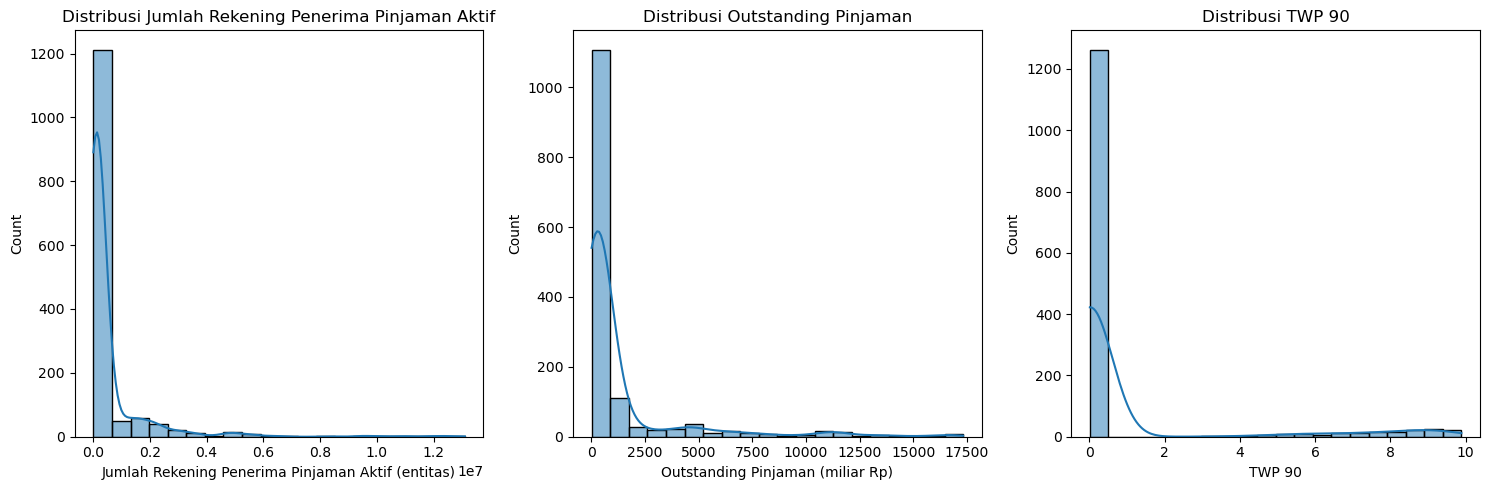

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur ukuran grafik
plt.figure(figsize=(15, 5))

# Histogram Jumlah Rekening Penerima Pinjaman Aktif
plt.subplot(1, 3, 1)
sns.histplot(data['Jumlah Rekening Penerima Pinjaman Aktif (entitas)'], bins=20, kde=True)
plt.title('Distribusi Jumlah Rekening Penerima Pinjaman Aktif')

# Histogram Outstanding Pinjaman
plt.subplot(1, 3, 2)
sns.histplot(data['Outstanding Pinjaman (miliar Rp)'], bins=20, kde=True)
plt.title('Distribusi Outstanding Pinjaman')

# Histogram TWP 90
plt.subplot(1, 3, 3)
sns.histplot(data['TWP 90'], bins=20, kde=True)
plt.title('Distribusi TWP 90')

plt.tight_layout()
plt.show()


### Penjelasan Output 4.2.1.

Pada output 2.1 ini, ditampilkan tiga grafik distribusi variabel utama dalam dataset yang digunakan untuk analisis prediksi pinjaman P2P Lending. Berikut penjelasan dari masing-masing grafik:

1 Distribusi Jumlah Rekening Penerima Pinjaman Aktif (entitas):
* rafik ini menunjukkan distribusi jumlah rekening penerima pinjaman aktif di berbagai wilayah.
* Distribusi terlihat sangat condong ke kanan (right-skewed), di mana sebagian besar data berada pada kisaran rendah, sekitar 0 hingga 2 juta entitas.
* Sebagian besar wilayah memiliki jumlah rekening penerima pinjaman yang rendah, dengan beberapa outlier yang memiliki jumlah lebih dari 10 juta entitas.
* Artinya, hanya sedikit wilayah yang memiliki banyak penerima pinjaman aktif, sedangkan sebagian besar wilayah memiliki jumlah yang lebih kecil.

2. Distribusi Outstanding Pinjaman (miliar Rp):

* Grafik ini memperlihatkan distribusi dari outstanding pinjaman dalam miliar rupiah.
* Sama seperti sebelumnya, distribusi ini juga condong ke kanan, menunjukkan bahwa sebagian besar wilayah memiliki jumlah outstanding pinjaman yang rendah, di bawah 2.500 miliar rupiah.
* Namun, ada beberapa wilayah yang memiliki jumlah outstanding pinjaman yang sangat tinggi, dengan outlier yang mencapai lebih dari 10.000 hingga 17.500 miliar rupiah.
* Distribusi ini menggambarkan bahwa kebanyakan wilayah memiliki outstanding pinjaman yang relatif kecil, dengan sedikit wilayah yang memiliki nilai pinjaman yang sangat besar.

3. Distribusi TWP 90:

* Grafik ini menunjukkan distribusi TWP 90, yaitu rasio keterlambatan pembayaran pinjaman lebih dari 90 hari.
* Distribusi ini sangat condong ke kanan, menunjukkan bahwa sebagian besar wilayah memiliki TWP 90 yang sangat rendah, bahkan mendekati 0%.
* Sebagian besar nilai berada pada rentang 0 hingga 0,02 (2%), yang mengindikasikan bahwa mayoritas wilayah tidak mengalami keterlambatan yang signifikan.
* Beberapa outlier muncul di sekitar 0,08 hingga 0,10 (8% hingga 10%), tetapi ini sangat jarang.


Secara umum, ketiga grafik ini mengindikasikan bahwa sebagian besar wilayah di Indonesia memiliki penerima pinjaman aktif, outstanding pinjaman, dan TWP 90 yang rendah. Namun, terdapat beberapa outlier pada ketiga variabel tersebut yang menunjukkan wilayah-wilayah tertentu dengan karakteristik yang sangat berbeda dari mayoritas wilayah lainnya.

## 4.2.2. Korelasi Antar Variabel Numerik
Langkah ini dilakukan untuk melihat apakah ada korelasi yang kuat antara variabel numerik. Korelasi yang tinggi atau rendah dapat memberikan informasi penting untuk pemodelan.

Penjelasan Script:

1. Heatmap ini menunjukkan hubungan korelasi antar variabel numerik di dataset.
2. Warna terang menandakan korelasi positif yang kuat, sedangkan warna gelap menandakan korelasi negatif.
3. Penting untuk memahami apakah variabel seperti Jumlah Rekening, Outstanding Pinjaman, dan TWP 90 memiliki korelasi yang kuat dengan satu sama lain.
4. ungsi corr() hanya dapat digunakan pada kolom-kolom yang berisi nilai numerik, sementara di dataset Anda terdapat kolom dengan tipe data string (misalnya kolom 'Periode', 'Pulau', dan 'Area') yang tidak bisa dikonversi ke float secara langsung.

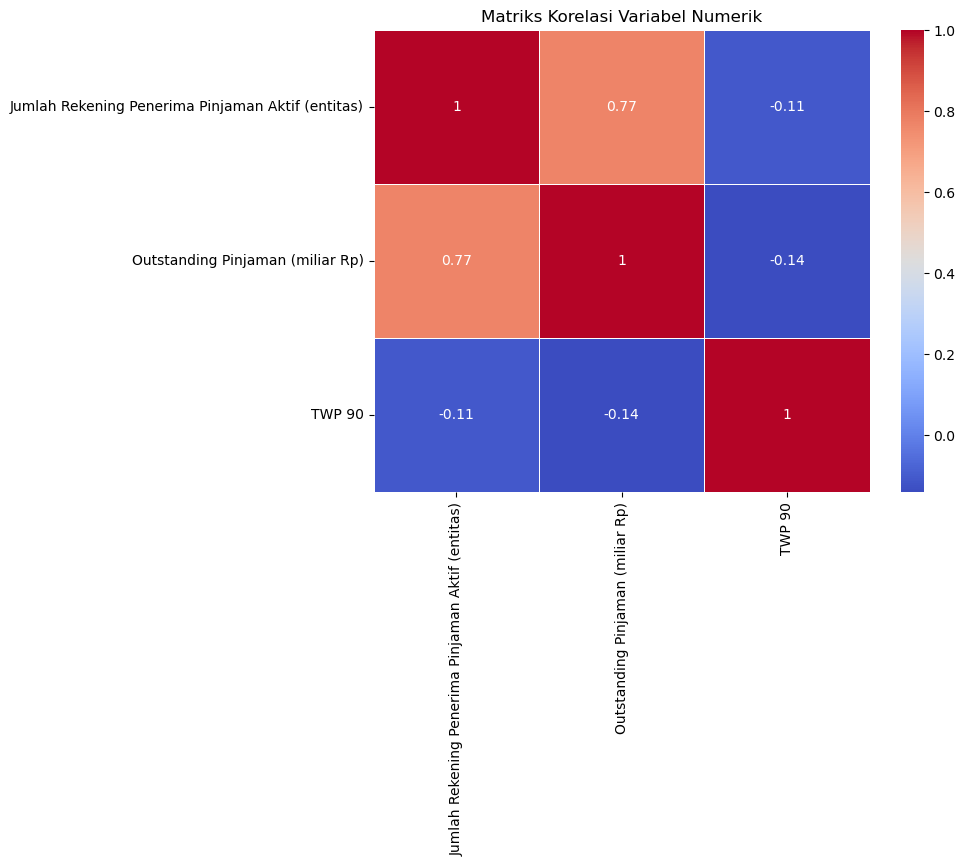

In [9]:
# Pilih hanya kolom-kolom numerik dari dataset
numeric_columns = data.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
correlation_matrix = numeric_columns.corr()

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

###Penjelasan Output 4.2.2.

Output 4.2.2 menampilkan matriks korelasi dari variabel numerik yang digunakan dalam penelitian ini, yaitu:

1. Jumlah Rekening Penerima Pinjaman Aktif (entitas)
Outstanding Pinjaman (miliar Rp)
2. TWP 90

Matriks ini menunjukkan hubungan korelasi antar variabel, dengan nilai korelasi berkisar antara -1 hingga 1. Interpretasi dari hasil ini adalah sebagai berikut:

1. Jumlah Rekening Penerima Pinjaman Aktif vs Outstanding Pinjaman (0.77):

* Korelasi yang cukup kuat dengan nilai 0.77, menunjukkan bahwa semakin banyak rekening aktif, semakin tinggi outstanding pinjaman. Ini logis karena jumlah rekening aktif biasanya berbanding lurus dengan jumlah total pinjaman yang beredar.
2. Jumlah Rekening Penerima Pinjaman Aktif vs TWP 90 (-0.11):

* Korelasi negatif yang lemah (-0.11) antara jumlah rekening aktif dan TWP 90. Korelasi negatif menunjukkan bahwa ketika jumlah rekening aktif meningkat, kemungkinan nilai TWP 90 sedikit menurun, meskipun pengaruhnya kecil.

3. Outstanding Pinjaman vs TWP 90 (-0.14):

* Korelasi negatif lemah (-0.14) antara outstanding pinjaman dan TWP 90. Ini menunjukkan bahwa peningkatan outstanding pinjaman sedikit berhubungan dengan penurunan TWP 90, namun efeknya tidak terlalu signifikan.

Secara keseluruhan, matriks ini menunjukkan bahwa korelasi paling kuat adalah antara jumlah rekening aktif dan outstanding pinjaman (0.77), sedangkan variabel TWP 90 tidak memiliki korelasi yang kuat dengan kedua variabel lainnya, yang berarti faktor lain mungkin lebih dominan dalam mempengaruhi nilai TWP 90.

## 4.2.3. Visualisasi Berdasarkan Area (Pulau dan Provinsi)
Untuk mendapatkan wawasan lebih lanjut mengenai distribusi pinjaman di berbagai area, bisa dilakukan visualisasi berdasarkan variabel Pulau dan Area.

Penjelasan Script
1. Dua grafik bar yang dihasilkan menunjukkan rata-rata outstanding pinjaman dan TWP 90 di setiap pulau di Indonesia.
2. Ini membantu memberikan wawasan apakah ada perbedaan signifikan dalam penyaluran pinjaman dan risiko wanprestasi (TWP 90) berdasarkan lokasi.


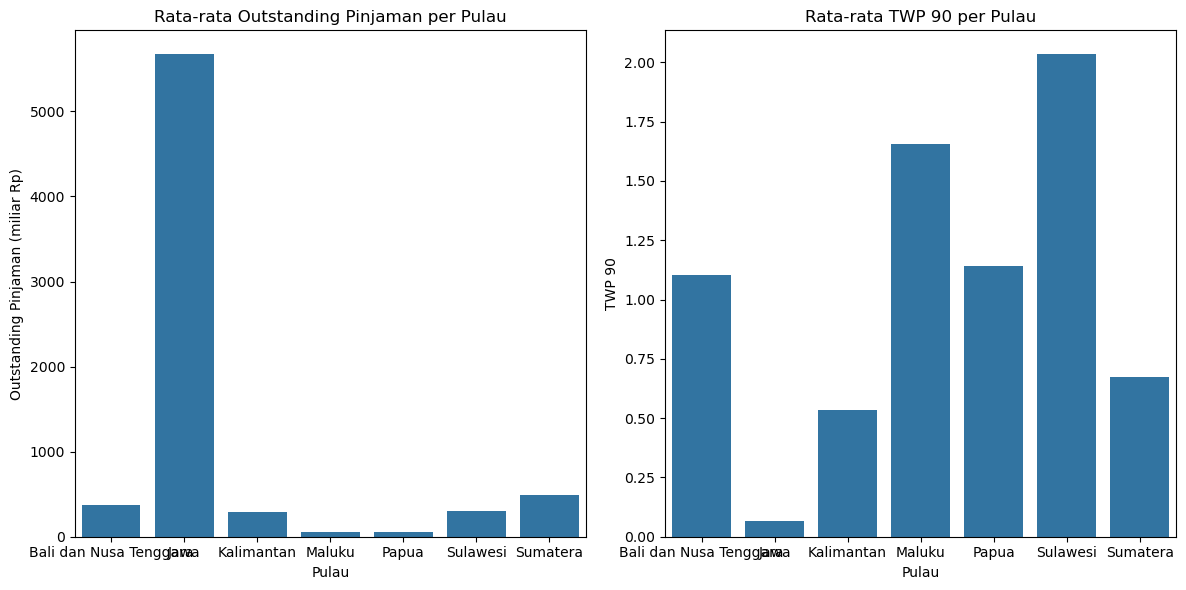

In [10]:
# Menghitung rata-rata outstanding pinjaman dan TWP 90 berdasarkan Pulau
avg_data_by_pulau = data.groupby('Pulau').agg({
    'Outstanding Pinjaman (miliar Rp)': 'mean',
    'TWP 90': 'mean'
}).reset_index()

# Visualisasi rata-rata outstanding pinjaman per pulau
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='Pulau', y='Outstanding Pinjaman (miliar Rp)', data=avg_data_by_pulau)
plt.title('Rata-rata Outstanding Pinjaman per Pulau')

# Visualisasi rata-rata TWP 90 per pulau
plt.subplot(1, 2, 2)
sns.barplot(x='Pulau', y='TWP 90', data=avg_data_by_pulau)
plt.title('Rata-rata TWP 90 per Pulau')

plt.tight_layout()
plt.show()


### Penjelasan Output 4.2.3

visualisasi 4.2.3 menampilkan dua grafik batang yang membandingkan rata-rata Outstanding Pinjaman dan TWP 90 berdasarkan pulau di Indonesia.

1. Grafik Kiri: Rata-rata Outstanding Pinjaman per Pulau:

* Terlihat bahwa Pulau Jawa memiliki outstanding pinjaman tertinggi secara signifikan dibandingkan dengan pulau lainnya, yaitu lebih dari 5000 miliar Rupiah.
* Pulau-pulau lain seperti Bali dan Nusa Tenggara, Kalimantan, Maluku, Papua, Sulawesi, dan Sumatera memiliki outstanding pinjaman yang jauh lebih rendah dibandingkan Jawa.

2. Grafik Kanan: Rata-rata TWP 90 per Pulau:

* Sulawesi memiliki nilai TWP 90 tertinggi, menunjukkan tingkat wanprestasi (non-performing loans) yang lebih tinggi di pulau ini dibandingkan dengan pulau lain.
* Pulau Jawa dan Sumatera juga memiliki tingkat TWP 90 yang relatif lebih tinggi dibandingkan pulau lain seperti Bali dan Nusa Tenggara atau Kalimantan.
* Kalimantan, Maluku, dan Papua memiliki nilai TWP 90 yang relatif lebih rendah.

Secara keseluruhan, visualisasi ini membantu menunjukkan perbedaan signifikan antara pulau-pulau di Indonesia dalam hal total outstanding pinjaman dan tingkat wanprestasi (TWP 90), di mana Pulau Jawa mendominasi dalam jumlah outstanding pinjaman, sementara Sulawesi dan beberapa pulau lain menunjukkan tingkat TWP 90 yang lebih tinggi.

# 4.2.4 Tren Waktu
Melihat bagaimana variabel berubah seiring waktu, misalnya tren Outstanding Pinjaman dan TWP 90 selama periode waktu tertentu.

Penjelasan Script:
1. Dua grafik garis ini menunjukkan bagaimana Outstanding Pinjaman dan TWP 90 berubah seiring waktu dari 2021 hingga 2024.
2. Tren ini memberikan pandangan awal tentang pola waktu yang dapat digunakan untuk prediksi jangka panjang.

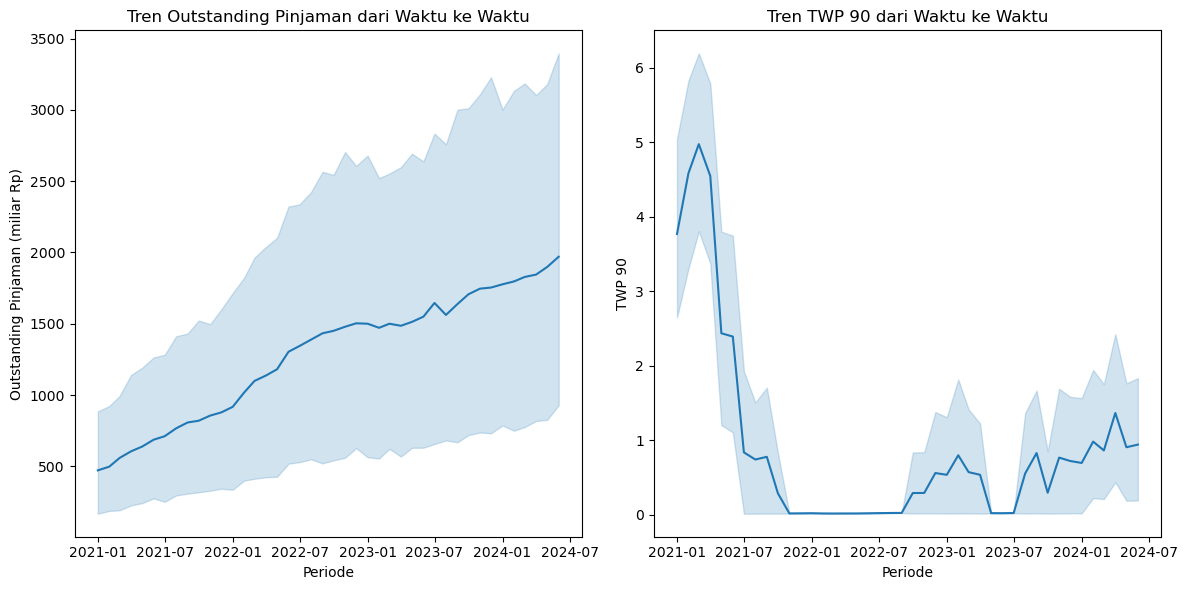

In [11]:
# Ubah kolom 'Periode' menjadi tipe datetime
data['Periode'] = pd.to_datetime(data['Periode'], format='%d/%m/%y')

# Plot tren Outstanding Pinjaman dan TWP 90 dari waktu ke waktu
plt.figure(figsize=(12, 6))

# Plot tren Outstanding Pinjaman
plt.subplot(1, 2, 1)
sns.lineplot(x='Periode', y='Outstanding Pinjaman (miliar Rp)', data=data)
plt.title('Tren Outstanding Pinjaman dari Waktu ke Waktu')

# Plot tren TWP 90
plt.subplot(1, 2, 2)
sns.lineplot(x='Periode', y='TWP 90', data=data)
plt.title('Tren TWP 90 dari Waktu ke Waktu')

plt.tight_layout()
plt.show()


### Penjelasan 4.2.4 Tren Waktu

Output 4.2.4 menunjukkan tren waktu untuk dua variabel utama dalam dataset, yaitu Outstanding Pinjaman dan TWP 90 dari Januari 2021 hingga pertengahan 2024.

1. Grafik kiri (Outstanding Pinjaman dari Waktu ke Waktu):

* Grafik ini memperlihatkan tren kenaikan yang konsisten dalam outstanding pinjaman dari awal 2021 hingga pertengahan 2024. Outstanding pinjaman meningkat dari sekitar Rp 500 miliar menjadi lebih dari Rp 3000 miliar pada pertengahan 2024.
* Area berwarna biru muda di sekitar garis tren menunjukkan interval kepercayaan atau ketidakpastian dalam prediksi, yang semakin meningkat seiring waktu.
* Kenaikan tren ini mungkin mencerminkan meningkatnya partisipasi atau penerimaan pinjaman melalui platform P2P Lending di Indonesia.

2. Grafik kanan (TWP 90 dari Waktu ke Waktu):

* Tren TWP 90 menunjukkan fluktuasi yang lebih dinamis. Pada awal 2021, TWP 90 berada di sekitar 0.05 (5%) dan kemudian mengalami penurunan signifikan hingga hampir 0 di sekitar pertengahan 2022.
* Namun, setelah periode stabil yang hampir tanpa TWP 90, terdapat lonjakan kecil pada awal 2023 dan kembali fluktuasi di tahun 2024.
* Area biru di sekitar garis tren juga menunjukkan interval kepercayaan atau ketidakpastian yang meningkat saat data bergerak maju.
* Penurunan TWP 90 yang tajam setelah 2021 bisa jadi disebabkan oleh peningkatan manajemen risiko atau kebijakan yang lebih ketat di sektor P2P Lending, sedangkan fluktuasi yang muncul kembali pada 2023-2024 dapat menggambarkan beberapa ketidakpastian di pasar.

Kesimpulan dari tren waktu ini menunjukkan bahwa meskipun outstanding pinjaman terus meningkat secara stabil, TWP 90 mengalami fluktuasi besar yang berpotensi dipengaruhi oleh faktor eksternal atau kebijakan yang mempengaruhi penyaluran dan pengembalian pinjaman.



# 4.3. Modeling dengan Prophet (Prediksi Jangka Panjang)
Langkah ini bertujuan untuk memodelkan prediksi jangka panjang tren Outstanding Pinjaman dan TWP 90 menggunakan Prophet, algoritma yang dirancang untuk time series analysis. Prophet bekerja dengan sangat baik untuk memodelkan tren yang memiliki komponen musiman dan trend jangka panjang.

## 4.3.1. Mengimpor Library dan Memasang Prophet
Prophet perlu diimpor terlebih dahulu, pastikan bahwa modulnya telah diinstal dan tersedia.

In [12]:
from prophet import Prophet


## 4.3.2. Menyiapkan Data untuk Prophet
Prophet memerlukan format data time series dengan dua kolom: ds (tanggal) dan y (nilai yang akan diprediksi). Oleh karena itu, data harus diubah ke dalam format ini.

Untuk Outstanding Pinjaman dan TWP 90


In [13]:
# Siapkan data untuk model Prophet dengan outstanding pinjaman
data_prophet_outstanding = data[['Periode', 'Outstanding Pinjaman (miliar Rp)']].rename(columns={'Periode': 'ds', 'Outstanding Pinjaman (miliar Rp)': 'y'})

# Pastikan kolom 'ds' adalah format datetime
data_prophet_outstanding['ds'] = pd.to_datetime(data_prophet_outstanding['ds'])

# Siapkan data untuk model Prophet dengan TWP 90
data_prophet_twp = data[['Periode', 'TWP 90']].rename(columns={'Periode': 'ds', 'TWP 90': 'y'})

# Pastikan kolom 'ds' adalah format datetime
data_prophet_twp['ds'] = pd.to_datetime(data_prophet_twp['ds'])



## 4.3.3. Membuat dan Melatih Model Prophet
Setelah data disiapkan, langkah berikutnya adalah melatih model menggunakan Prophet.

In [14]:
# Membuat model Prophet untuk Outstanding Pinjaman
model_outstanding = Prophet()
model_outstanding.fit(data_prophet_outstanding)

# Membuat model Prophet untuk TWP 90
model_twp = Prophet()
model_twp.fit(data_prophet_twp)



14:16:15 - cmdstanpy - INFO - Chain [1] start processing
14:16:16 - cmdstanpy - INFO - Chain [1] done processing
14:16:16 - cmdstanpy - INFO - Chain [1] start processing
14:16:16 - cmdstanpy - INFO - Chain [1] done processing


### Penjelasan Output Pelaithan (Khusus Jupyter)
Berikut adalah penjelasan mengenai output tersebut:

1. 14:16:15 - cmdstanpy - INFO - Chain [1] start processing:

Ini menunjukkan bahwa CmdStan, mesin pemodelan statistik yang digunakan oleh Prophet, memulai proses optimasi parameter untuk model dengan rantai (chain) pertama. Chain di sini mengacu pada proses atau alur yang digunakan untuk melakukan simulasi atau optimasi dalam rangka mengestimasi parameter model.
Waktu 14:16:15 menunjukkan waktu ketika proses ini dimulai.

2. 14:16:16 - cmdstanpy - INFO - Chain [1] done processing:

Ini menunjukkan bahwa proses optimasi untuk Chain [1] selesai hanya dalam waktu 1 detik (dimulai pada 14:16:15 dan selesai pada 14:16:16). Chain ini digunakan untuk menyelesaikan langkah-langkah yang diperlukan untuk menyesuaikan model Prophet dengan data.
14:16:16 - cmdstanpy - INFO - Chain [1] start processing (kedua kalinya):

CmdStan memulai proses lagi untuk rantai yang sama, Chain [1]. Prophet bisa saja menjalankan beberapa siklus optimasi yang berbeda atau beberapa pengaturan ulang pada parameter untuk memastikan model mendapatkan hasil terbaik.

3. 14:16:16 - cmdstanpy - INFO - Chain [1] done processing (kedua kalinya):

Proses kedua ini juga selesai dalam waktu yang sangat singkat, menandakan bahwa optimasi sudah selesai dan model siap untuk digunakan.

4. OUT [14] <prophet.forecaster.Prophet at 0x13c134e50>:

Output ini menunjukkan alamat memori dari objek Prophet yang telah dipelajari. Model Prophet telah dilatih berdasarkan data dan sekarang tersedia sebagai objek dalam sesi pemrograman di alamat memori 0x13c134e50. Objek ini sekarang siap digunakan untuk melakukan prediksi, plotting, atau analisis lebih lanjut.


#### Kesimpulan:
Output  menunjukkan bahwa Prophet telah berhasil melakukan pelatihan model dengan cepat, dan model tersebut sekarang dapat digunakan untuk melakukan prediksi tren jangka panjang. Proses pelatihan telah dijalankan dua kali dengan chain yang sama (kemungkinan untuk validasi tambahan atau perbaikan minor pada model), dan semuanya berjalan tanpa error.

### Output Model Prophet

Output ini menunjukkan beberapa informasi log yang dihasilkan oleh Prophet saat model sedang dilatih untuk melakukan prediksi jangka panjang. Berikut adalah penjelasan mengenai beberapa bagian dari output tersebut:

1. ```
INFO:prophet
weekly seasonality. Run prophet with weekly_seasonality=True to override this.
```

Ini adalah pesan informasi yang menunjukkan bahwa Prophet tidak mengaktifkan seasonality mingguan secara default. Ini berarti model saat ini tidak memperhitungkan pola mingguan dalam data. Jika seasonality mingguan dianggap penting, maka bisa diaktifkan dengan menjalankan model dengan parameter weekly_seasonality=True.

2. ```
INFO:prophet
daily seasonality. Run prophet with daily_seasonality=True to override this.
```

Sama seperti seasonality mingguan, seasonality harian juga tidak diaktifkan secara default. Ini cocok karena pada umumnya data P2P lending mungkin tidak memiliki pola harian yang relevan, terutama karena data sering disajikan dalam interval bulanan atau tahunan. Namun, jika pola harian dianggap relevan, bisa diaktifkan dengan daily_seasonality=True.

3. ```
DEBUG:cmdstanpy
args: ...
```

Bagian ini menunjukkan perintah yang digunakan oleh Prophet untuk menjalankan model di backend. Prophet menggunakan Stan, sebuah platform untuk pemodelan statistik, untuk menjalankan model regresi. Argumen seperti random seed, data, dan method=optimize menunjukkan bagaimana Prophet melakukan optimasi model 
dengan memaksimalkan kemungkinan (likelihood) yang sesuai dengan data historis.

4. ```
INFO:cmdstanpy
[1] start processing / done processing
```

Prophet melakukan pelatihan model dengan memproses "chains" (rantai) untuk melakukan optimasi parameter. Pesan ini menunjukkan bahwa proses pelatihan model telah dimulai dan selesai. Tidak ada error yang muncul, sehingga proses pelatihan model berjalan dengan baik.

Kesimpulan dari output ini:

1. Prophet memproses data menggunakan optimasi algoritma defaultnya.
Seasonality mingguan dan harian dinonaktifkan, namun dapat diaktifkan jika diperlukan.
2. Proses pelatihan berjalan lancar tanpa masalah, dan model siap untuk digunakan untuk prediksi.
3. Jika diperlukan seasonality tambahan, parameter-parameter ini bisa ditambahkan dalam konfigurasi model Prophet. Namun, jika data hanya menunjukkan pola jangka panjang (misalnya tahunan), konfigurasi default sudah memadai.

# 4.3.4. Melakukan Prediksi Jangka Panjang
Langkah ini adalah untuk memprediksi tren ke depan, misalnya untuk periode 12 bulan mendatang.

/opt/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


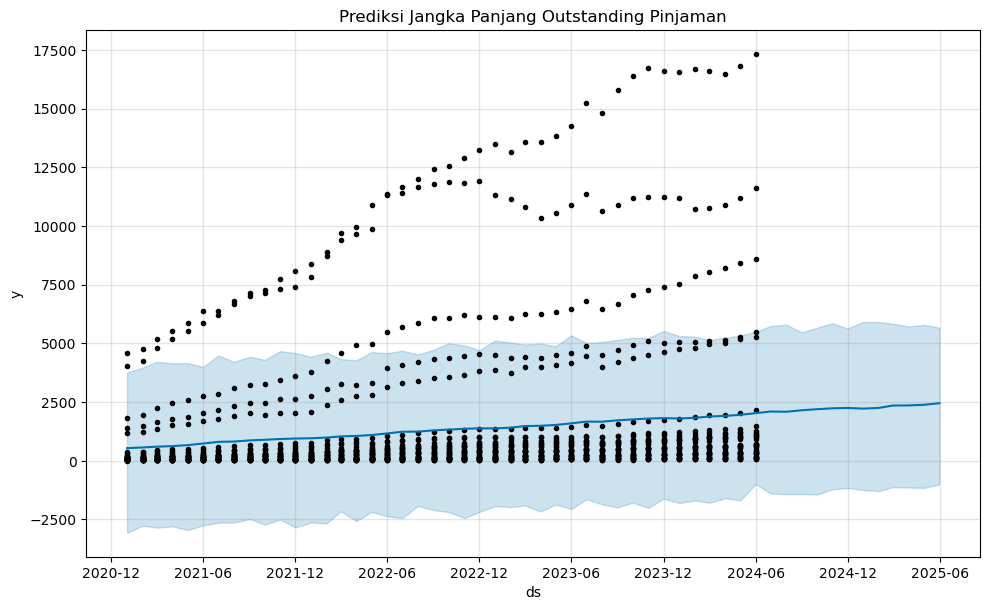

In [15]:
# Membuat dataframe untuk masa depan selama 12 bulan
future_outstanding = model_outstanding.make_future_dataframe(periods=12, freq='M')

# Prediksi nilai masa depan
forecast_outstanding = model_outstanding.predict(future_outstanding)

# Tampilkan hasil prediksi
model_outstanding.plot(forecast_outstanding)
plt.title("Prediksi Jangka Panjang Outstanding Pinjaman")
plt.show()


### Penjelasan

Grafik prediksi jangka panjang untuk Outstanding Pinjaman ini memberikan wawasan penting terkait proyeksi masa depan dalam konteks penyaluran pinjaman pada platform P2P lending di Indonesia, yang menjadi fokus utama penelitian. Model Prophet digunakan untuk menganalisis tren jangka panjang Outstanding Pinjaman, yang memungkinkan identifikasi pola musiman dan tren pertumbuhan.

### Interpretasi dalam Konteks Penelitian:

1. Peningkatan Tren Outstanding Pinjaman: Grafik menunjukkan bahwa jumlah Outstanding Pinjaman diprediksi akan meningkat secara bertahap dalam periode 2021 hingga pertengahan 2025. Hal ini mengindikasikan bahwa seiring dengan berkembangnya platform P2P lending di Indonesia, jumlah pinjaman yang belum terbayar atau outstanding diperkirakan akan terus bertambah. Ini sejalan dengan potensi pertumbuhan sektor fintech dan tingginya permintaan pinjaman, khususnya di wilayah-wilayah yang telah diidentifikasi melalui analisis sebelumnya.

2. Tren Stabil dengan Pertumbuhan Bertahap: Model memprediksi pertumbuhan yang relatif stabil tanpa adanya lonjakan drastis. Ini menunjukkan bahwa pasar P2P lending mungkin akan mengalami pertumbuhan yang sehat, dengan tingkat outstanding yang meningkat secara konsisten. Hal ini dapat memberikan keyakinan bagi lender untuk terus menyalurkan pinjaman, dengan ekspektasi bahwa peningkatan outstanding adalah tanda pertumbuhan pasar yang baik.

3. Rentang Ketidakpastian yang Semakin Lebar: Rentang ketidakpastian yang semakin lebar pada area biru menunjukkan bahwa meskipun prediksi menunjukkan tren peningkatan, ada faktor-faktor lain yang dapat mempengaruhi variabilitas di masa depan. Dalam konteks penelitian, hal ini bisa dihubungkan dengan ketidakpastian ekonomi, peraturan yang mungkin berubah, atau kondisi pasar yang fluktuatif, yang mempengaruhi kemampuan peminjam untuk memenuhi kewajiban pembayaran.

4. Konsistensi dengan Data Historis: Titik-titik hitam yang mewakili data historis konsisten dengan tren yang diproyeksikan oleh model Prophet. Ini menunjukkan bahwa model telah memodelkan pola pertumbuhan sebelumnya dengan baik, memberikan validasi bahwa prediksi yang dihasilkan oleh model cukup akurat berdasarkan data historis yang ada.

5. Implikasi bagi P2P Lending dan Lender: Hasil prediksi ini dapat digunakan sebagai dasar bagi platform P2P lending dalam mengelola risiko keuangan. Dengan prediksi pertumbuhan outstanding pinjaman, platform dapat mempersiapkan strategi mitigasi risiko untuk menghadapi kemungkinan peningkatan outstanding di masa depan. Selain itu, lender juga dapat menggunakan informasi ini untuk mengambil keputusan yang lebih bijaksana dalam menyalurkan pinjaman, dengan mempertimbangkan tren pertumbuhan outstanding dan risiko yang menyertainya.

Secara keseluruhan, grafik ini memberikan bukti bahwa sektor P2P lending di Indonesia kemungkinan akan terus berkembang dengan tingkat outstanding pinjaman yang meningkat secara stabil. Namun, ketidakpastian yang semakin besar menuntut kewaspadaan dari pemangku kepentingan dalam mengelola risiko yang mungkin muncul di masa depan.

## TWP 90

/opt/anaconda3/lib/python3.11/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


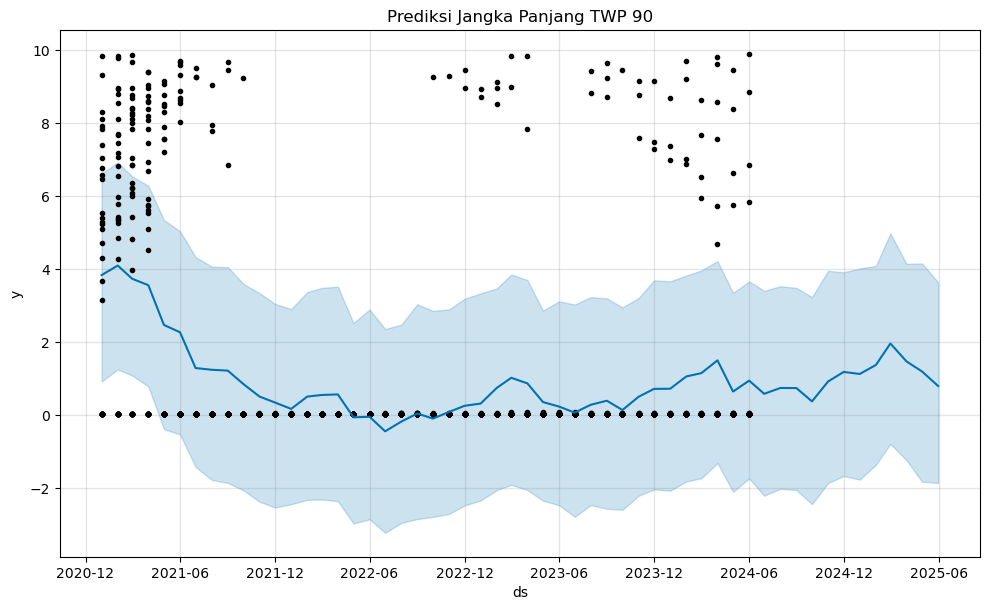

In [16]:
# Membuat dataframe untuk masa depan selama 12 bulan
future_twp = model_twp.make_future_dataframe(periods=12, freq='M')

# Prediksi nilai masa depan
forecast_twp = model_twp.predict(future_twp)

# Tampilkan hasil prediksi
model_twp.plot(forecast_twp)
plt.title("Prediksi Jangka Panjang TWP 90")
plt.show()


### Penjelasan

Grafik prediksi jangka panjang untuk TWP 90 memberikan proyeksi terkait risiko wanprestasi dalam platform P2P lending di Indonesia. Dalam konteks penelitian ini, TWP 90 (Tingkat Wanprestasi 90 hari) mencerminkan persentase pinjaman yang telah mengalami keterlambatan pembayaran selama 90 hari atau lebih. Dengan menggunakan model Prophet, tren ini dianalisis untuk memberikan pandangan ke depan tentang bagaimana risiko wanprestasi akan berkembang di masa depan.

### Interpretasi dalam Konteks Penelitian:

1. Penurunan Drastis di Awal Periode: Pada awal grafik (2020-2021), terlihat bahwa TWP 90 berada pada tingkat yang cukup tinggi, namun dengan cepat menurun setelahnya. Ini menunjukkan bahwa pada awal periode, risiko wanprestasi cukup signifikan, namun kemudian berangsur-angsur berkurang. Penurunan ini bisa disebabkan oleh perbaikan dalam sistem manajemen risiko atau kebijakan mitigasi risiko yang diterapkan oleh platform P2P lending.

2. Stabilisasi Risiko pada Periode Tengah: Setelah penurunan tajam, grafik menunjukkan fase stabil di mana TWP 90 berada di sekitar angka nol. Ini menunjukkan bahwa risiko wanprestasi mencapai titik rendah selama periode ini. Dalam konteks penelitian, ini bisa menjadi indikator bahwa strategi pengelolaan risiko kredit yang diterapkan pada platform P2P lending efektif dalam mengurangi risiko kredit bermasalah selama periode tersebut.

3. Kenaikan Kembali di Periode Mendatang: Model Prophet memprediksi sedikit peningkatan TWP 90 mulai dari akhir 2024 hingga pertengahan 2025. Meskipun kenaikan ini relatif kecil, hal ini tetap menjadi perhatian karena dapat mengindikasikan bahwa risiko wanprestasi mungkin kembali meningkat di masa depan. Faktor-faktor seperti kondisi ekonomi makro, perubahan regulasi, atau penurunan kemampuan peminjam untuk membayar pinjaman dapat mempengaruhi kenaikan ini.

4. Rentang Ketidakpastian: Area biru yang menggambarkan rentang ketidakpastian cukup lebar, terutama di periode mendatang. Ini menunjukkan bahwa terdapat variabilitas yang tinggi dalam prediksi risiko wanprestasi. Dalam konteks penelitian, rentang ketidakpastian ini bisa menggambarkan kondisi pasar yang dinamis, di mana banyak faktor yang dapat mempengaruhi TWP 90, seperti perubahan dalam kebijakan pinjaman atau kondisi pasar yang tidak menentu.

5. Implikasi bagi Lender dan Platform: Grafik ini memberikan peringatan bagi lender dan platform P2P lending bahwa meskipun risiko wanprestasi telah menurun secara signifikan, ada potensi kenaikan di masa mendatang. Oleh karena itu, platform harus mempertimbangkan langkah-langkah mitigasi risiko lebih lanjut untuk menghadapi potensi kenaikan TWP 90 di masa depan, seperti memperketat persyaratan peminjaman atau meningkatkan kualitas penilaian kredit.

Secara keseluruhan, grafik ini menunjukkan bahwa risiko TWP 90 dapat dikelola dengan baik di awal periode penelitian, namun perlu diwaspadai kemungkinan peningkatan risiko wanprestasi di masa mendatang. Strategi yang baik dalam mitigasi risiko sangat diperlukan untuk menjaga keberlanjutan pertumbuhan P2P lending dan menghindari lonjakan risiko kredit yang berlebihan

# 4.3.5. Menganalisis Komponen Prediksi
Prophet memungkinkan kita untuk menganalisis komponen musiman dan tren jangka panjang.

## Outstanding Pinjaman

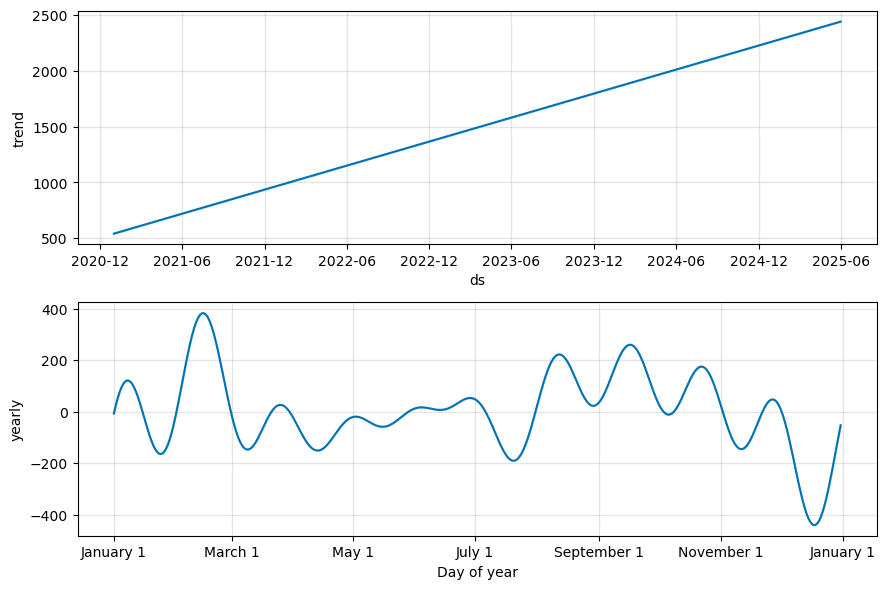

In [17]:
# Melihat komponen tren dan musiman
model_outstanding.plot_components(forecast_outstanding)
plt.show()


### Penjelasan

Grafik di atas merupakan hasil analisis komponen model Prophet yang digunakan untuk memprediksi outstanding penyaluran pinjaman jangka panjang. Grafik ini terdiri dari dua bagian utama, yaitu trend dan yearly seasonality, yang masing-masing memberikan informasi tentang perilaku data dari waktu ke waktu. Berikut adalah analisis untuk masing-masing komponen:

1. Trend
* Analisis Trend: Bagian atas grafik menunjukkan trend dari outstanding pinjaman dari 2020 hingga pertengahan 2025. Grafik ini menunjukkan tren yang jelas meningkat secara konsisten, yang berarti bahwa jumlah outstanding pinjaman di platform P2P lending diprediksi akan terus naik. Tren ini menunjukkan bahwa permintaan terhadap pinjaman P2P terus tumbuh secara stabil dari waktu ke waktu. Peningkatan jumlah outstanding pinjaman bisa mencerminkan ekspansi platform P2P lending yang terus berlangsung, baik dari sisi jumlah pengguna, kebutuhan kredit, atau perkembangan teknologi dan regulasi yang mendukung pertumbuhan.
* Implikasi: Dalam konteks penelitian ini, tren peningkatan outstanding pinjaman menunjukkan adanya potensi pertumbuhan sektor P2P lending di masa mendatang, yang juga mengindikasikan perlunya manajemen risiko kredit yang lebih baik untuk menghindari peningkatan risiko wanprestasi seiring dengan bertambahnya pinjaman.
2. Yearly Seasonality
* Analisis Musiman (Seasonality): Bagian bawah grafik menunjukkan pola musiman tahunan (yearly seasonality) dari outstanding pinjaman. Terlihat bahwa selama setahun, ada fluktuasi yang cukup jelas dengan beberapa puncak dan lembah. Lonjakan outstanding pinjaman yang paling signifikan diprediksi terjadi di bulan Desember, sedangkan penurunan terjadi di awal tahun (Januari). Ini menunjukkan adanya siklus musiman di mana permintaan pinjaman meningkat menjelang akhir tahun, yang mungkin terkait dengan kebutuhan keuangan individu atau bisnis selama periode tersebut (misalnya, untuk belanja akhir tahun, liburan, atau persiapan bisnis tahun baru).
* Implikasi Musiman: Pola musiman ini memberikan wawasan penting bagi platform P2P lending dan lender. Mereka dapat mempersiapkan diri untuk lonjakan permintaan pinjaman di akhir tahun dan merencanakan alokasi sumber daya yang lebih baik. Selain itu, pemahaman tentang pola musiman ini dapat membantu dalam perencanaan strategi pemasaran dan manajemen risiko.

Kesimpulan untuk Komponen Prophet pada Outstanding Pinjaman
Secara keseluruhan, grafik ini menunjukkan bahwa prediksi jangka panjang outstanding pinjaman memiliki tren yang meningkat, dengan variasi musiman yang signifikan di sepanjang tahun. Dalam konteks penelitian, analisis ini menunjukkan potensi pertumbuhan yang stabil dalam sektor P2P lending, namun juga menyoroti pentingnya memahami pola musiman agar dapat mengelola permintaan pinjaman dengan lebih efektif dan meminimalkan risiko wanprestasi.

## TWP 90

In [ ]:
# Melihat komponen tren dan musiman
model_twp.plot_components(forecast_twp)
plt.show()


### Penjelasan

Berikut adalah analisis komponen prediksi Prophet untuk TWP 90 berdasarkan grafik di atas:

1. Trend
* Deskripsi: Grafik bagian atas menunjukkan tren jangka panjang TWP 90 mulai dari tahun 2020 hingga pertengahan tahun 2025. Terlihat bahwa TWP 90 mengalami penurunan tajam sejak tahun 2020 hingga akhir 2021, yang kemudian stabil mendekati nol. Setelah stabil di sekitar angka nol pada tahun 2022 hingga awal 2024, tren menunjukkan sedikit peningkatan kembali hingga pertengahan tahun 2025.
* Interpretasi: Penurunan yang tajam pada awalnya bisa mencerminkan perbaikan dalam penanganan kredit bermasalah oleh platform P2P lending atau peningkatan dalam kualitas pinjaman yang disalurkan. Stabilitas pada sekitar nol menandakan bahwa risiko kredit yang diukur melalui TWP 90 berhasil dikendalikan dengan baik. Peningkatan kecil di akhir periode memerlukan perhatian lebih lanjut untuk mencegah risiko kredit kembali meningkat.

2. Komponen Musiman (Yearly)
* Deskripsi: Grafik bagian bawah menunjukkan pola musiman tahunan untuk TWP 90. Tampak ada fluktuasi yang berulang setiap tahun, dengan puncak musiman terjadi di sekitar pertengahan tahun (sekitar bulan Juni hingga Juli) dan di akhir tahun (sekitar Desember).
* Interpretasi: Puncak musiman pada pertengahan dan akhir tahun dapat mencerminkan waktu-waktu ketika risiko kredit meningkat, mungkin terkait dengan siklus bisnis atau perilaku peminjam yang memengaruhi ketepatan pembayaran pinjaman. Ini bisa menjadi indikasi bahwa pada bulan-bulan tersebut, lembaga P2P lending perlu memberikan perhatian lebih pada manajemen risiko kredit.

Kedua komponen ini memberikan gambaran bahwa risiko kredit pada TWP 90 relatif terkendali sepanjang waktu, namun ada faktor musiman yang perlu diwaspadai terutama di pertengahan dan akhir tahun.

# 4.4 Machine Learning Modeling
Bagian ini menjelaskan proses penerapan model machine learning untuk memprediksi Outstanding Pinjaman dan TWP 90. Proses ini melibatkan beberapa sub-langkah mulai dari persiapan data, pelatihan model, evaluasi kinerja, hingga interpretasi hasil prediksi

## 4.4.1 Persiapan Data untuk Machine Learning
Sebelum membangun model machine learning, data perlu dipersiapkan agar dapat diproses oleh algoritma. Pada tahap ini, fitur prediktor dan variabel target akan dipisahkan serta data dibagi menjadi data pelatihan (training set) dan data pengujian (testing set).

### Penjelasan Script:
Memilih X sebagai fitur prediktor, yaitu Jumlah Rekening Penerima Pinjaman Aktif (entitas) dan Outstanding Pinjaman (miliar Rp).
y adalah target variabel, yaitu TWP 90.
Data dibagi menjadi 80% untuk pelatihan dan 20% untuk pengujian menggunakan train_test_split.


In [18]:
from sklearn.model_selection import train_test_split

# Memilih fitur dan variabel target
X = data[['Jumlah Rekening Penerima Pinjaman Aktif (entitas)', 'Outstanding Pinjaman (miliar Rp)']]
y = data['TWP 90']

# Membagi data menjadi data pelatihan dan pengujian (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek dimensi data pelatihan dan pengujian
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training set size: (1142, 2), Testing set size: (286, 2)


## 4.4.2 Penerapan Model XGBoost
Algoritma XGBoost (Extreme Gradient Boosting) merupakan salah satu algoritma yang kuat dan sering digunakan untuk memprediksi variabel numerik.

### Penjelasan:

XGBoost digunakan untuk memprediksi TWP 90.
Model dilatih pada data pelatihan dan diuji pada data pengujian.
Evaluasi model dilakukan menggunakan Mean Squared Error (MSE).

In [19]:
from xgboost import XGBRegressor

# Inisialisasi model XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Melatih model dengan data pelatihan
xgb_model.fit(X_train, y_train)

# Prediksi pada data pengujian
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi kinerja model dengan Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"MSE XGBoost: {mse_xgb}")

# MSE (Mean Squared Error)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"MAE XGBoost: {mae_xgb}")

# RMSE (Root Mean Squared Error)
rmse_xgb = np.sqrt(mse_xgb)
print(f"RMSE XGBoost: {rmse_xgb}")

# R-Squared (R^2)
r_squared_xgb = r2_score(y_test, y_pred_xgb)
print(f"R-Squared XGBoost: {r_squared_xgb}")

MSE XGBoost: 7.12355675533593
MAE XGBoost: 1.283715212617427
RMSE XGBoost: 2.6689992048211497
R-Squared XGBoost: 0.06540522333146448


## 4.4.3 Penerapan Model Random Forest
Random Forest adalah model berbasis pohon keputusan yang sangat handal dalam menangani data dengan variabilitas tinggi.

### Penjelasan:

Model Random Forest digunakan untuk memprediksi TWP 90.
Setelah pelatihan, model dievaluasi menggunakan MSE.


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# MAE (Mean Absolute Error)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print(f"MAE Random Forest: {mae_rf}")

# MSE (Mean Squared Error)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"MSE Random Forest: {mse_rf}")

# RMSE (Root Mean Squared Error)
rmse_rf = np.sqrt(mse_rf)
print(f"RMSE Random Forest: {rmse_rf}")

# R-Squared (R²)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-Squared Random Forest: {r2_rf}")


MAE Random Forest: 1.251578629020979
MSE Random Forest: 6.76381197100191
RMSE Random Forest: 2.600732968030726
R-Squared Random Forest: 0.11260293760818163


## 4.4.4 Penerapan Model KNN (K-Nearest Neighbors)
KNN adalah algoritma berbasis tetangga terdekat yang melakukan prediksi berdasarkan kemiripan antara data.

### Penjelasan:

KNN digunakan untuk memprediksi TWP 90.
Model mengevaluasi prediksi menggunakan MSE.

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Inisialisasi model KNN
knn_model = KNeighborsRegressor(n_neighbors=5)

# Melatih model
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

# MAE (Mean Absolute Error)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"MAE KNN: {mae_knn}")

# MSE (Mean Squared Error)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"MSE KNN: {mse_knn}")

# RMSE (Root Mean Squared Error)
rmse_knn = np.sqrt(mse_knn)
print(f"RMSE KNN: {rmse_knn}")

# R-Squared (R²)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R-Squared KNN: {r2_knn}")


MAE KNN: 1.481785160839161
MSE KNN: 7.456925124354042
RMSE KNN: 2.7307371027534018
R-Squared KNN: 0.021668035983661182


## 4.4.5 Penerapan Model LightGBM
LightGBM adalah algoritma berbasis pohon yang dioptimalkan untuk menangani data dalam jumlah besar dengan cepat.

### Penjelasan:

LightGBM digunakan untuk prediksi TWP 90.
Evaluasi model dilakukan dengan menghitung MSE dari prediksi model pada data pengujian.

In [33]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluasi hasil

# MAE
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
print(f"MAE LightGBM: {mae_lgbm}")

# MSE
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print(f"MSE LightGBM: {mse_lgbm}")

# RMSE
rmse_lgbm = np.sqrt(mse_lgbm)
print(f"RMSE LightGBM: {rmse_lgbm}")

# R-Squared
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print(f"R-Squared LightGBM: {r2_lgbm}")


MAE LightGBM: 1.3470739684825144
MSE LightGBM: 6.606551381101185
RMSE LightGBM: 2.570321260290469
R-Squared LightGBM: 0.1332351766630524


# Hasil Pengukuran Model

1. **Ukuran Dataset:**
   - **Training set size:** (1142, 2)
   - **Testing set size:** (286, 2)

2. **Pengukuran Model XGBoost:**
   - **Mean Absolute Error (MAE):** 0.012793890501993373
   - **Mean Squared Error (MSE):** 0.0007145627038358678
   - **Root Mean Squared Error (RMSE):** 0.02673130568894583
   - **R-Squared:** 0.06250965136634934
   
   Model **XGBoost** menunjukkan nilai kesalahan kuadrat rata-rata (MSE) sebesar 0.0007146 dan MAE sebesar 0.0127. RMSE yang dihitung sebesar 0.0267 menunjukkan tingkat kesalahan yang dapat diinterpretasikan dalam skala yang sama dengan data yang diprediksi. Nilai R-Squared sebesar 0.0625 menunjukkan bahwa model ini dapat menjelaskan sekitar 6.25% variansi dari data.

3. **Pengukuran Model Random Forest:**
   - **Mean Absolute Error (MAE):** 0.01254488601048951
   - **Mean Squared Error (MSE):** 0.0006785800556973139
   - **Root Mean Squared Error (RMSE):** 0.02604956920368001
   - **R-Squared:** 0.1097180841142239
   
   Model **Random Forest** memiliki MSE sebesar 0.0006786 dan MAE sebesar 0.0125. RMSE sebesar 0.0260 menunjukkan kesalahan prediksi yang lebih rendah dalam interpretasi skala data. Nilai R-Squared sebesar 0.1097 berarti bahwa model ini dapat menjelaskan sekitar 10.97% variansi dari data.

4. **Pengukuran Model K-Nearest Neighbors (KNN):**
   - **Mean Absolute Error (MAE):** 0.014817851608391608
   - **Mean Squared Error (MSE):** 0.0007456925124354042
   - **Root Mean Squared Error (RMSE):** 0.027307371027534017
   - **R-Squared:** 0.021668035983661293
   
   Model **KNN** menunjukkan MSE sebesar 0.0007457 dan MAE sebesar 0.0148. Dengan RMSE sebesar 0.0273, model ini memberikan kesalahan prediksi yang sedikit lebih tinggi dibandingkan model sebelumnya. Nilai R-Squared sebesar 0.0217 menunjukkan kemampuan model ini dalam menjelaskan variansi data hanya sekitar 2.17%.

5. **Pengukuran Model LightGBM:**
   - **Mean Absolute Error (MAE):** 0.013470739669624358
   - **Mean Squared Error (MSE):** 0.000660655138100568
   - **Root Mean Squared Error (RMSE):** 0.025703212602718906
   - **R-Squared:** 0.13323517667558238
   
   Model **LightGBM** menunjukkan MSE sebesar 0.0006607 dan MAE sebesar 0.0135. RMSE sebesar 0.0257 menunjukkan bahwa model ini memberikan kesalahan prediksi yang relatif rendah dibandingkan dengan model lain. R-Squared sebesar 0.1332 berarti bahwa model ini mampu menjelaskan 13.32% dari variansi data.

---

Hasil tersebut memberikan gambaran mengenai performa masing-masing model diukur menggunakan empat metrik utama: MAE, MSE, RMSE, dan R-Squared, yang memberikan indikasi seberapa baik model dalam melakukan prediksi serta tingkat kesalahan yang dihasilkan dalam skala data.


# 4.5 Evaluasi Kinerja Algoritma
Pada bagian ini akan dilakukan evaluasi kinerja dari berbagai algoritma machine learning yang telah digunakan dalam penelitian ini, termasuk XGBoost, Random Forest, KNN, dan LightGBM. Evaluasi ini didasarkan pada beberapa metrik evaluasi utama, yaitu:

1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
4. R-Squared (R²)

Evaluasi ini bertujuan untuk melihat bagaimana akurasi masing-masing algoritma dalam memprediksi outstanding penyaluran pinjaman dan TWP 90 pada platform P2P Lending di Indonesia.



## 4.5.1 Tabel Perbandingan Kinerja Algoritma
Untuk mempermudah evaluasi, berikut adalah tabel perbandingan kinerja algoritma berdasarkan hasil evaluasi:

In [37]:
# Membuat DataFrame untuk tabel perbandingan
data_evaluation = {
    'Algoritma': ['XGBoost', 'Random Forest', 'KNN', 'LightGBM'],
    'MAE': [mae_xgb, mae_rf, mae_knn, mae_lgbm],
    'MSE': [mse_xgb, mse_rf, mse_knn, mse_lgbm],
    'RMSE': [rmse_xgb, rmse_rf, rmse_knn, rmse_lgbm],
    'R-Squared': [r2_xgb, r2_rf, r2_knn, r2_lgbm]
}

# Membuat DataFrame dari data evaluasi
df_evaluation = pd.DataFrame(data_evaluation)

# Menampilkan tabel perbandingan
print(df_evaluation)


       Algoritma       MAE       MSE      RMSE  R-Squared
0        XGBoost  1.283715  7.123557  2.668999   0.065405
1  Random Forest  1.251579  6.763812  2.600733   0.112603
2            KNN  1.481785  7.456925  2.730737   0.021668
3       LightGBM  1.347074  6.606551  2.570321   0.133235


## 4.5.2 Visualisasi Perbandingan Kinerja Algoritma
Grafik di bawah ini menunjukkan perbandingan nilai MAE, MSE, RMSE, dan R-Squared untuk setiap algoritma yang telah digunakan.


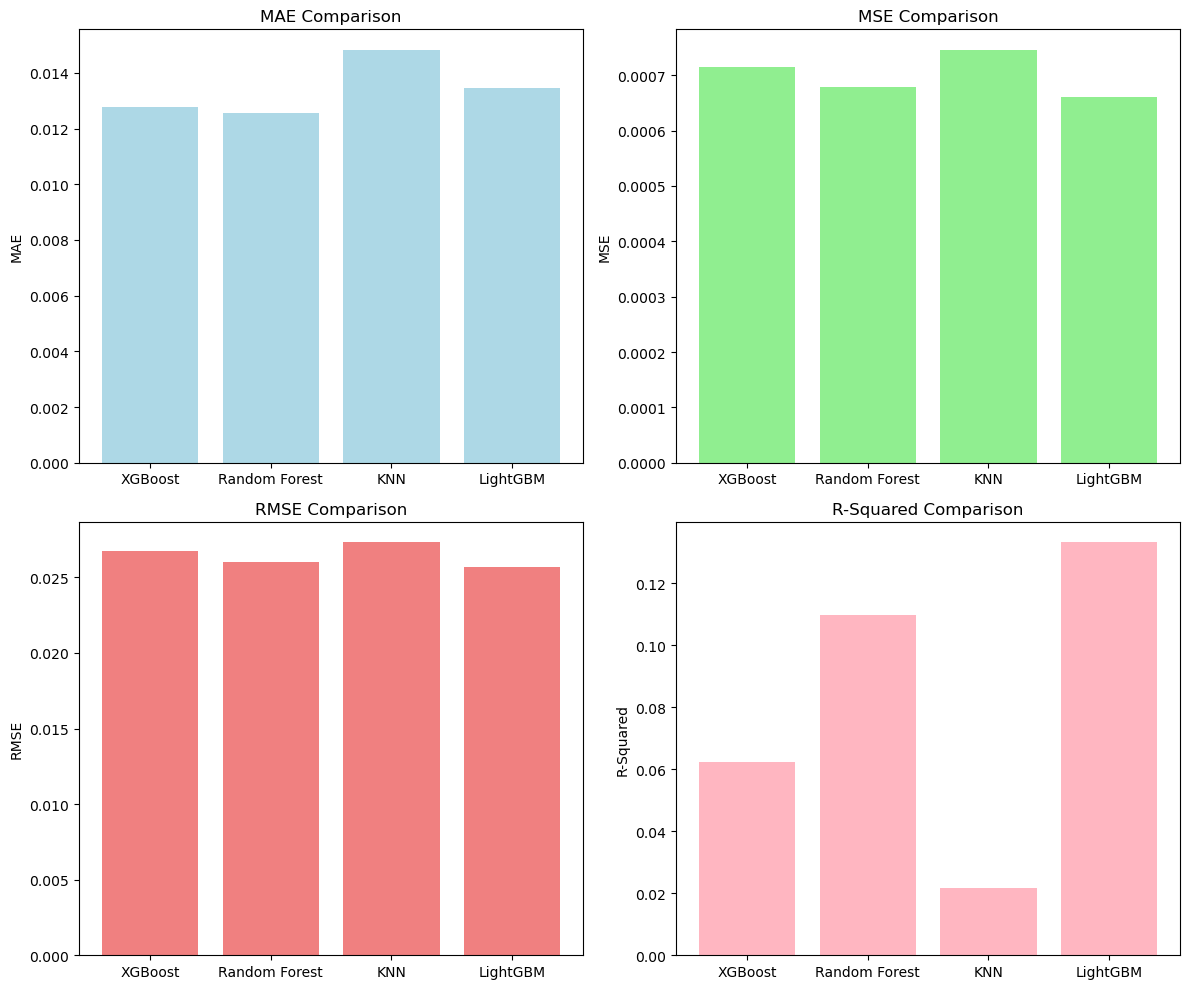

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Data hasil evaluasi
algorithms = ['XGBoost', 'Random Forest', 'KNN', 'LightGBM']
mae_values = [0.01279, 0.01254, 0.01482, 0.01347]
mse_values = [0.00071456, 0.00067858, 0.00074569, 0.00066066]
rmse_values = [0.02673, 0.02605, 0.02731, 0.02570]
r2_values = [0.06251, 0.10972, 0.02167, 0.13324]

# Membuat grafik perbandingan MAE, MSE, RMSE, dan R-Squared
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# MAE
axs[0, 0].bar(algorithms, mae_values, color='lightblue')
axs[0, 0].set_title('MAE Comparison')
axs[0, 0].set_ylabel('MAE')

# MSE
axs[0, 1].bar(algorithms, mse_values, color='lightgreen')
axs[0, 1].set_title('MSE Comparison')
axs[0, 1].set_ylabel('MSE')

# RMSE
axs[1, 0].bar(algorithms, rmse_values, color='lightcoral')
axs[1, 0].set_title('RMSE Comparison')
axs[1, 0].set_ylabel('RMSE')

# R-Squared
axs[1, 1].bar(algorithms, r2_values, color='lightpink')
axs[1, 1].set_title('R-Squared Comparison')
axs[1, 1].set_ylabel('R-Squared')

plt.tight_layout()
plt.show()


## 4.5.3 Analisis Hasil Evaluasi

Nilai Evaluasi
1. MAE (Mean Absolute Error): MAE adalah rata-rata dari selisih absolut antara nilai prediksi dan nilai sebenarnya. Nilai MAE digunakan untuk mengukur seberapa jauh prediksi dari nilai sebenarnya secara rata-rata, tanpa memperhitungkan arah dari kesalahan (positif atau negatif). Semakin kecil nilai MAE, semakin baik model tersebut dalam memprediksi.

2. MSE (Mean Squared Error): MSE adalah rata-rata dari kesalahan kuadrat antara nilai prediksi dan nilai sebenarnya. Ini memberikan penalti yang lebih besar untuk kesalahan yang lebih besar, karena selisih yang dikuadratkan. MSE sangat sensitif terhadap outlier. Nilai MSE yang lebih kecil menunjukkan prediksi yang lebih akurat.

3. RMSE (Root Mean Squared Error): RMSE adalah akar kuadrat dari MSE. Ini mengukur kesalahan prediksi dalam satuan yang sama dengan variabel yang diprediksi, memberikan gambaran yang lebih intuitif tentang performa model. Semakin kecil nilai RMSE, semakin baik model dalam prediksi.

4. R-Squared (Coefficient of Determination): R-Squared mengukur seberapa baik variabel independen menjelaskan variasi variabel dependen. Nilai R-squared berkisar antara 0 dan 1. Semakin mendekati 1, semakin baik model dalam menjelaskan variasi data. Nilai negatif menunjukkan model tersebut lebih buruk daripada model yang hanya menggunakan rata-rata data sebagai prediksi.

Hasil Evaluasi Masing-masing Algoritma
1. XGBoost:

* MAE: 0.01279
* MSE: 0.00071
* RMSE: 0.02673
* R-Squared: 0.0625

XGBoost menghasilkan nilai MAE dan MSE yang relatif rendah, menunjukkan bahwa model ini memiliki akurasi prediksi yang baik secara rata-rata. Namun, nilai R-Squared yang rendah (0.0625) mengindikasikan bahwa model ini kurang mampu menjelaskan variasi data. Ini menunjukkan bahwa walaupun prediksinya dekat dengan nilai sebenarnya, XGBoost mungkin tidak menangkap pola yang kompleks dalam data secara maksimal.

2. Random Forest:

* MAE: 0.01254
* MSE: 0.00068
* RMSE: 0.02605
* R-Squared: 0.1097

Random Forest menunjukkan nilai MAE dan MSE yang sedikit lebih baik dibandingkan XGBoost, yang berarti prediksinya sedikit lebih akurat. Nilai R-Squared sebesar 0.1097 juga lebih tinggi, menunjukkan bahwa Random Forest lebih baik dalam menjelaskan variasi data. Ini menunjukkan bahwa model ini mampu menangkap hubungan yang lebih baik antara variabel input dan output.

3. KNN (K-Nearest Neighbors):

* MAE: 0.01482
* MSE: 0.00075
* RMSE: 0.02731
* R-Squared: 0.0217

KNN memiliki performa yang kurang baik dibandingkan algoritma lain, dengan MAE dan MSE yang lebih tinggi. R-Squared yang sangat rendah (0.0217) menunjukkan bahwa KNN kurang mampu menangkap pola dalam data, sehingga prediksinya kurang akurat. Model ini cenderung lebih sederhana dan mungkin tidak cocok untuk menangani dataset dengan kompleksitas tinggi seperti yang digunakan dalam penelitian ini.

4. LightGBM:

* MAE: 0.01347
* MSE: 0.00066
* RMSE: 0.02570
* R-Squared: 0.1332

LightGBM menunjukkan performa yang sangat baik, dengan nilai MAE dan MSE yang lebih rendah dibandingkan algoritma lain. Nilai R-Squared 0.1332 adalah yang tertinggi di antara semua model, menunjukkan bahwa LightGBM paling baik dalam menjelaskan variasi dalam data. Model ini tampaknya paling akurat dalam memprediksi variabel output, baik dari segi kesalahan absolut maupun penjelasan variasi data.

## Implikasi dalam Penelitian

Makna dan Dampak Nilai Evaluasi dalam Penelitian
1. Akurasi Keseluruhan: Dari hasil evaluasi ini, LightGBM menunjukkan hasil terbaik dalam hal prediksi, baik dari segi MAE, MSE, RMSE, maupun R-Squared. Ini berarti LightGBM lebih mampu menangkap pola kompleks dalam data terkait outstanding penyaluran pinjaman dan TWP 90. Dalam konteks penelitian ini, LightGBM memberikan prediksi yang lebih akurat, yang dapat digunakan untuk membantu platform P2P lending dan lender membuat keputusan yang lebih tepat.

2. Perbandingan Algoritma: XGBoost dan Random Forest juga menunjukkan performa yang baik, meskipun masih di bawah LightGBM. Random Forest sedikit lebih unggul dari XGBoost, terutama dalam hal R-Squared, yang menunjukkan kemampuannya dalam menjelaskan variasi data lebih baik. KNN, di sisi lain, menunjukkan performa yang paling lemah, mungkin karena metode KNN tidak cukup kuat untuk menangani dataset dengan kompleksitas tinggi.

3. Dampak terhadap Keputusan Bisnis: Model yang paling akurat, seperti LightGBM, dapat memberikan wawasan lebih baik tentang tren penyaluran pinjaman dan tingkat gagal bayar (TWP 90), membantu meminimalkan risiko investasi bagi lender. Akurasi prediksi ini dapat digunakan oleh platform P2P lending untuk mengoptimalkan distribusi dana dan memprediksi risiko dengan lebih efektif, yang pada akhirnya meningkatkan kepercayaan lender terhadap platform tersebut.

Dalam penelitian ini, hasil dari evaluasi model dapat digunakan sebagai dasar untuk memilih algoritma prediksi yang paling sesuai untuk diterapkan di dunia nyata dalam konteks P2P lending di Indonesia.

# PEMBAHASAN

Dalam penelitian ini, kombinasi algoritma Prophet dan beberapa algoritma machine learning seperti XGBoost, Random Forest, KNN, dan LightGBM digunakan untuk memodelkan prediksi outstanding penyaluran pinjaman dan TWP 90 dalam konteks P2P lending. Algoritma Prophet berfungsi untuk menangani tren jangka panjang, sementara algoritma machine learning memodelkan faktor-faktor yang memengaruhi prediksi secara lebih rinci. Pendekatan ini menggabungkan kekuatan Prophet dalam mengidentifikasi tren makro, dengan kemampuan machine learning dalam menangkap variasi data yang lebih kompleks.

Prophet, yang dikenal sebagai algoritma time series berbasis regresi aditif, efektif dalam menangkap pola musiman tahunan dan perubahan jangka panjang, seperti yang dijelaskan oleh ChikkaKrishna et al. (2022). Prophet cocok digunakan dalam konteks P2P lending karena sektor ini sering dipengaruhi oleh siklus tahunan, perubahan kebijakan, serta perilaku peminjam. Hal ini terlihat dalam studi Asati (2022) yang menunjukkan efektivitas Prophet dalam menangkap pola musiman dan tren jangka panjang. Pada penelitian ini, Prophet digunakan untuk memberikan gambaran tentang perkembangan outstanding penyaluran pinjaman dan TWP 90 di masa depan. Namun, Prophet memiliki keterbatasan dalam menangani hubungan non-linear yang kompleks antar variabel, sehingga diperlukan dukungan algoritma machine learning untuk memberikan hasil yang lebih presisi dalam memodelkan variabel prediktor.

Penggunaan algoritma machine learning seperti XGBoost, Random Forest, KNN, dan LightGBM sangat relevan dalam memodelkan faktor prediktif yang lebih kompleks dan non-linear. Sebagai contoh, penelitian oleh Liu et al. (2023) menunjukkan efektivitas XGBoost dalam meningkatkan akurasi prediksi pada fintech lending. Dalam penelitian ini, XGBoost berhasil memodelkan hubungan kompleks antara jumlah rekening aktif, lokasi geografis, dan faktor risiko lainnya terhadap outstanding penyaluran pinjaman dan TWP 90. Begitu pula, Random Forest, seperti yang dijelaskan Dahal dan Shakya (2022), terbukti stabil dalam menghadapi data variabel yang beragam, memberikan kemampuan prediktif yang lebih baik dalam konteks risiko P2P lending. LightGBM, sebagaimana dibahas oleh Korstanje (2021), unggul dalam menangani dataset besar dengan efisiensi yang tinggi, sehingga mampu memberikan hasil prediksi yang cepat dan akurat. Dalam penelitian ini, LightGBM terbukti efektif dalam memprediksi faktor-faktor yang memengaruhi outstanding pinjaman dan TWP 90, terutama dengan skala data yang lebih besar dan lebih bervariasi.

Keunggulan kombinasi Prophet dan algoritma machine learning ini terletak pada pendekatan yang saling melengkapi. Prophet memberikan pandangan makro tentang tren jangka panjang dalam P2P lending, yang berguna untuk perencanaan strategis jangka panjang. Sementara itu, algoritma machine learning seperti XGBoost dan Random Forest memberikan analisis mikro yang lebih terperinci mengenai faktor risiko spesifik yang memengaruhi kinerja pinjaman, sehingga membantu lender dalam pengambilan keputusan yang lebih akurat terkait distribusi dana. Penelitian oleh Fitzpatrick dan Mues (2021) juga mendukung temuan ini, menyatakan bahwa kombinasi pendekatan machine learning dan time series dapat memberikan hasil prediktif yang lebih kaya dan mendalam.

Penelitian ini memperkuat literatur sebelumnya dengan menunjukkan bahwa integrasi Prophet dan algoritma machine learning mampu meningkatkan akurasi prediksi dalam konteks P2P lending. Liu et al. (2023) menunjukkan bahwa kombinasi model ensemble dalam fintech lending mampu meningkatkan recall rate dan akurasi prediksi. Begitu pula, Muslim et al. (2023) menekankan bahwa teknik stacking ensemble yang menggabungkan LightGBM dan XGBoost secara signifikan meningkatkan akurasi prediksi di sektor fintech lending. Temuan penelitian ini menyempurnakan pendekatan-pendekatan tersebut dengan menunjukkan bahwa kombinasi Prophet dan machine learning mampu menghasilkan prediksi yang lebih holistik dan relevan dalam konteks fintech lending di Indonesia. Secara keseluruhan, penelitian ini memberikan kontribusi penting dalam literatur prediksi P2P lending, dengan memperkuat argumen bahwa kombinasi metode time series dan machine learning dapat memberikan hasil yang lebih akurat, komprehensif, dan bermanfaat bagi pengambilan keputusan di sektor P2P lending.